# What drives the price of a car?

![](images/kurt.jpeg)

###**OVERVIEW**

This notebook explores a dataset from kaggle containing data on 426,000 used cars listed for sale. The goal is to understand what factors make a car more or less expensive for my client, a used car dealership. The results of the analysis are presented as recommendations as to what consumers value in a used car and a pricing model froecasting the sales price of new listings. The analysis was conducted using the CRISP-DM framework.

##**1. Business Understanding**

###**1.1 Objectives**

###Primary objective

The client objective is to identify the primary drivers of used car value.

###Business Questions
When a new vehicle arrives, it is assessed and then listed for sale. What attributes are most valued by customers? How attractive is the vehicle to customers? What should the initial price of the vehicle be?

###Success criteria
This project will first identify the top 3-5 vehicle characteristics that determine the sales price. A pricing model tool will allow the client to set an attractive initial price for new vehicle listings.



###**1.2 Situation**

###Resources
We have secured a dataset consisting of nearly 500,000 used car listings on Craigslist sites across the U.S. The project is led by consultant with expertise in data mining and modeling. The analysis will be performed using a Python coding in a Jupyter notebook running in Google CoLab.

###Assumptions and Constraints
Since we are using a national dataset, we are forced to assume that used car preferences are consistent across regions. We do not have sufficient data to identify differences in our our particular local market, for example, whether customers value specific vehicle attributes more or less highly than the national average.

Also, since the data is based on listings and not sales, we do not know the ultimate sales prices of the vehicles. Items listed on Craigslist often sell for less than the listed price, once the parties negotiate.

###Risks and contingencies
We do not anticipate significant risks or delays to successful project delivery.

###**1.3 Data Mining Goals**

 The data mining goals are to a) identify the most valuable attributes of used cars, and b) predict the sales price of a vehicle.

###Success Criteria
A pricing model which achieves a minimum of 80% accuracy.

###**1.4 Project Plan**

###Steps
1. Data Understanding. The data will be explored and assessed for quality, including the distributions of each attribute and identification of missing values.

2. Data Preparation. Attributes will be selected for inclusion in models, with   imputation of missing values as needed, and construction of new attributes.

3. Modeling. Appropriate modeling techniques will be applied, including testing fit, computing accuracy metrics, and tuning model parameters to improve both.

4. Evaluation. Data mining and modeling results will be reviewed and evaluated against the business and data mining goals and success criteria.

5. Deployment. A final report and plan for model deployment, monitoring and maintenance will be provided.

###Tools and Techniques

Linear regression on the target feature "price" will be the primary modeling technique used in this analysis.


##**2. Data Understanding**



###**2.1 Data Description**

The dataset was sourced from Kaggle but originally scraped from Craigslist. It has 426,000 unique vehicle listings with 18 attributes for each listing, including location and vehicle attributes, year of sale and sales price.

###**2.2 Data Exploration**

In [209]:
import pandas as pd
import numpy as np
import seaborn as sns

In [210]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [211]:
data = pd.read_csv('/content/drive/MyDrive/MLAI_Haas/data/vehicles.csv')

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   condition     252776 non-null  object 
 7   cylinders     249202 non-null  object 
 8   fuel          423867 non-null  object 
 9   odometer      422480 non-null  float64
 10  title_status  418638 non-null  object 
 11  transmission  424324 non-null  object 
 12  VIN           265838 non-null  object 
 13  drive         296313 non-null  object 
 14  size          120519 non-null  object 
 15  type          334022 non-null  object 
 16  paint_color   296677 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [ ]:
data.sample(5)


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
49015,7315330111,reno / tahoe,18990,2013.0,volkswagen,gti hatchback sedan,good,NaN,other,20448.0,clean,other,WVWHV7AJ0DW121800,fwd,NaN,sedan,NaN,ca
90716,7313426367,"washington, DC",45000,1997.0,NaN,Freightliner,excellent,8 cylinders,diesel,290000.0,clean,automatic,NaN,rwd,NaN,other,blue,dc
389669,7307144085,charlottesville,17980,2017.0,buick,regal,NaN,NaN,gas,42044.0,clean,automatic,2G4GL5EX7H9114387,fwd,NaN,NaN,white,va
343483,7305549104,rhode island,16500,2005.0,ford,mustang gt,excellent,8 cylinders,gas,49000.0,clean,manual,NaN,rwd,NaN,coupe,black,ri
369052,7316736626,dallas / fort worth,4500,1974.0,dodge,dart,fair,8 cylinders,gas,50000.0,clean,automatic,NaN,rwd,NaN,NaN,NaN,tx


In [212]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
data.describe()


,id,price,year,odometer
count,426880.00,426880.00,425675.00,422480.00
mean,7311486634.22,75199.03,2011.24,98043.33
std,4473170.41,12182282.17,9.45,213881.50
min,7207408119.00,0.00,1900.00,0.00
25%,7308143339.25,5900.00,2008.00,37704.00
50%,7312620821.00,13950.00,2013.00,85548.00
75%,7315253543.50,26485.75,2017.00,133542.50
max,7317101084.00,3736928711.00,2022.00,10000000.00


In [ ]:
cat_col = list(data.select_dtypes("object").columns)
# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts().reset_index())
    print("-" * 50)

                  region  count
0         tampa bay area   1593
1                 hawaii   1590
2          south florida   1508
3                houston   1494
4          new york city   1480
..                   ...    ...
399  west virginia (old)      4
400             meridian      4
401    central louisiana      4
402        tuscarawas co      3
403         southwest MS      1

[404 rows x 2 columns]
--------------------------------------------------
       manufacturer  count
0              ford  23473
1         chevrolet  18023
2            toyota  11535
3            nissan   8300
4             honda   8216
5              jeep   7252
6               bmw   6096
7             dodge   5014
8               ram   4731
9     mercedes-benz   4712
10          hyundai   4688
11              gmc   4549
12           subaru   4081
13              kia   3868
14       volkswagen   3782
15            lexus   2959
16             audi   2933
17         chrysler   2833
18         cadillac   2484
1

In [ ]:
#check for duplicates
data.duplicated().value_counts()

,count
False,426880


##**2.3 Data Cleaning**

The initial look at the data has revealed a couple of issues that need to be cleaned up before applying any filters.

1. Replace all values of "0" with null values, to prevent skewing the descriptive statistics, particularly for in Price, Odometer, and Year.

2. Although there are no duplicated records, there are many duplicate listings for the same vehicle VIN. For example, users listed their cars in multiple regions or relisted on a later date for a lower price. Duplicate VINs need to be removed. Listings will first be sorted by price such that only the listing with the lowest price is retained, reflecting the lack of customer interest at higher prices.



In [162]:
#Replace all zeros with null values
data.replace(0, np.nan, inplace=True)
data.shape

(426880, 18)

In [ ]:
#Check for duplicate VINs
data.groupby('VIN').count()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,state
VIN,,,,,,,,,,,,,,,,,
0,25,25,14,25,19,19,14,14,25,24,25,25,9,9,14,12,25
00000000000A26444,1,1,0,1,1,1,0,0,1,1,1,1,0,0,0,0,1
00000000000A35665,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1
00000000000A42482,1,1,0,1,1,1,0,0,1,1,1,1,1,0,0,0,1
00000000000A44554,1,1,0,1,1,1,0,0,1,1,1,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZN661YUA4LX344692,2,2,2,2,0,2,1,0,2,2,2,2,0,0,0,2,2
ZN661YUL1HX236166,1,1,1,1,0,1,0,0,1,1,1,1,0,0,1,1,1
ZN661YUL3HX198178,1,1,1,1,0,1,0,0,1,1,1,1,0,0,1,1,1


In [163]:
#If we drop duplicate VINs, null values will be included, so these must be filled
#First, fill null VINs with Vehicle ID number
data['VIN'].fillna(data['id'], inplace=True)
data['VIN'].isna().sum()

0

In [135]:
data.duplicated('VIN').value_counts()

,count
False,279288
True,147592


In [164]:
#Sort data by price and then remove duplicate VINs, so the most recent price (lowest) is kept
data.sort_values('price')
data.drop_duplicates(subset='VIN', keep='last', inplace=True)
data.duplicated('VIN').value_counts()
#data.info()

,count
False,279288


###**2.4 Data Filtering**

Now that the dataset consists of 279,288 unique vehicles, we will filter it to drop unrealistic listings and according to my client's policies:
*   Only clean titles and no salvage vehicles
*   No buses
*   No vehicles over 25 years old
*   No vehicles listed with less than 1,000 or over 150,000 miles
*   No vehicles priced under 1,000 or over 50,000 dollars



In [165]:
#Identify listings with title status other than 'clean'
data['clean_title']=data['title_status'].apply(lambda x: 1 if x=='clean' else 0)
data.clean_title.value_counts()



,count
clean_title,
1,262930
0,16358


In [166]:
#Keep only listings with a clean title and not salvage condition
data = data[data.clean_title==1]
data = data[data.condition!='salvage']
data.shape

(262705, 19)

In [167]:
#Drop listings for buses, off-road vehicles, and motorcycles
data = data[data.type!='bus']
data = data[data.type!='offroad']
data = data[data['manufacturer']!='harley-davidson']
data.shape

(261631, 19)

In [168]:
#Drop vehicles over 25 years old
data = data[data.year>1996]
data.shape

(245051, 19)

In [169]:
#Drop vehicles listed with under 1,000 or over 150,000 miles
data = data[data.odometer>1000]
data = data[data.odometer<150000]
data.shape

(178251, 19)

In [170]:
#Drop listings with a price less than $1,000 or over $50,000
data = data[data.price>1000]
data = data[data.price<50000]
data.shape

(149861, 19)

In [171]:
#Convert year feature to age, calculated from most recent year of data
data['age'] = 2022 - data['year']
data.describe()

,id,price,year,odometer,clean_title,age
count,1.498610e+05,149861.000000,149861.000000,149861.000000,149861.0,149861.000000
mean,7.311609e+09,17255.700182,2012.574205,84008.336552,1.0,9.425795
std,4.379352e+06,11074.311862,4.986895,40345.559685,0.0,4.986895
min,7.301583e+09,1003.000000,1997.000000,1001.000000,1.0,0.000000
25%,7.308199e+09,8312.000000,2010.000000,50000.000000,1.0,6.000000
50%,7.312915e+09,14900.000000,2013.000000,89000.000000,1.0,9.000000
75%,7.315291e+09,23995.000000,2016.000000,118065.000000,1.0,12.000000
max,7.317101e+09,49999.000000,2022.000000,149998.000000,1.0,25.000000


In [172]:
#Correct some data entry errors
data['condition'].replace({'new':'like new'}, inplace=True)
data['cylinders'].replace({'5 cylinders':'other'}, inplace=True)
data['cylinders'].replace({'3 cylinders':'other'}, inplace=True)
data['manufacturer'].replace({'rover':'land rover'}, inplace=True)
data.shape


(149861, 20)

In [173]:
#Aggregate pickup and truck into pickup category
data['type'].replace({'truck':'pickup'}, inplace=True)
data.shape

(149861, 20)

In [174]:
#Aggregate luxury manufacturers into a new "luxury" category to reduce the number of manufacturers
data['manufacturer'].replace({'acura':'luxury'}, inplace=True)
data['manufacturer'].replace({'alfa-romeo':'luxury'}, inplace=True)
data['manufacturer'].replace({'aston-martin':'luxury'}, inplace=True)
data['manufacturer'].replace({'audi':'luxury'}, inplace=True)
data['manufacturer'].replace({'bmw':'luxury'}, inplace=True)
data['manufacturer'].replace({'cadillac':'luxury'}, inplace=True)
data['manufacturer'].replace({'ferrari':'luxury'}, inplace=True)
data['manufacturer'].replace({'infiniti':'luxury'}, inplace=True)
data['manufacturer'].replace({'jaguar':'luxury'}, inplace=True)
data['manufacturer'].replace({'land rover':'luxury'}, inplace=True)
data['manufacturer'].replace({'lexus':'luxury'}, inplace=True)
data['manufacturer'].replace({'lincoln':'luxury'}, inplace=True)
data['manufacturer'].replace({'mercedes-benz':'luxury'}, inplace=True)
data['manufacturer'].replace({'porsche':'luxury'}, inplace=True)
data['manufacturer'].replace({'tesla':'luxury'}, inplace=True)
data['manufacturer'].replace({'volvo':'luxury'}, inplace=True)
data.shape

(149861, 20)

In [175]:
#Save to cleaned data file
data.to_csv('/content/drive/MyDrive/MLAI_Haas/data/vehicles_clean.csv')

###**2.5 Data Quality**

The final cleaned dataset has 149,861 vehicle listings. Now we will look at the descriptive statistics, with visualizations, and make some observations.


In [148]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149861 entries, 31 to 426879
Data columns (total 20 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149861 non-null  int64  
 1   region        149861 non-null  object 
 2   price         149861 non-null  float64
 3   year          149861 non-null  float64
 4   manufacturer  146014 non-null  object 
 5   model         148719 non-null  object 
 6   condition     149861 non-null  object 
 7   cylinders     92826 non-null   object 
 8   fuel          149087 non-null  object 
 9   odometer      149861 non-null  float64
 10  title_status  149861 non-null  object 
 11  transmission  149330 non-null  object 
 12  VIN           149861 non-null  object 
 13  drive         107961 non-null  object 
 14  size          52598 non-null   object 
 15  type          112361 non-null  object 
 16  paint_color   107411 non-null  object 
 17  state         149861 non-null  object 
 18  clean_ti

In [ ]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)
data.describe()

,Unnamed: 0,id,price,year,odometer,clean_title,age
count,149861.00,149861.00,149861.00,149861.00,149861.00,149861.00,149861.00
mean,217955.47,7311609279.77,17255.70,2012.57,84008.34,1.00,9.43
std,124644.38,4379351.53,11074.31,4.99,40345.56,0.00,4.99
min,31.00,7301583321.00,1003.00,1997.00,1001.00,1.00,0.00
25%,110441.00,7308198541.00,8312.00,2010.00,50000.00,1.00,6.00
50%,218466.00,7312914681.00,14900.00,2013.00,89000.00,1.00,9.00
75%,330321.00,7315291006.00,23995.00,2016.00,118065.00,1.00,12.00
max,426879.00,7317101084.00,49999.00,2022.00,149998.00,1.00,25.00


In [149]:
cat_col = list(data.select_dtypes("object").columns)
# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts().reset_index())
    print("-" * 50)

                  region  count
0         tampa bay area   1593
1                 hawaii   1589
2          south florida   1507
3                houston   1493
4          new york city   1480
..                   ...    ...
399  west virginia (old)      4
400             meridian      4
401    central louisiana      4
402        tuscarawas co      3
403         southwest MS      1

[404 rows x 2 columns]
--------------------------------------------------
   manufacturer  count
0        luxury  27127
1          ford  23468
2     chevrolet  18017
3        toyota  11535
4        nissan   8300
5         honda   8215
6          jeep   7252
7         dodge   5014
8           ram   4730
9       hyundai   4688
10          gmc   4549
11       subaru   4080
12          kia   3867
13   volkswagen   3782
14     chrysler   2832
15        mazda   2155
16        buick   2061
17         mini   1167
18   mitsubishi   1061
19      pontiac    799
20       saturn    536
21      mercury    424
22         f

In [ ]:
data.head()


,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state,clean_title
31,7316356412,auburn,15000.00,2013.00,ford,f-150 xlt,excellent,6 cylinders,gas,128000.00,clean,automatic,7316356412,rwd,full-size,truck,black,al,1
34,7316285779,auburn,35000.00,2019.00,toyota,tacoma,excellent,6 cylinders,gas,43000.00,clean,automatic,7316285779,4wd,NaN,truck,grey,al,1
55,7314560853,auburn,19900.00,2004.00,ford,f250 super duty,good,8 cylinders,diesel,88000.00,clean,automatic,7314560853,4wd,full-size,pickup,blue,al,1
59,7313406529,auburn,14000.00,2012.00,honda,odyssey,excellent,6 cylinders,gas,95000.00,clean,automatic,7313406529,fwd,full-size,mini-van,silver,al,1
65,7312847466,auburn,22500.00,2001.00,ford,f450,good,8 cylinders,diesel,144700.00,clean,manual,7312847466,rwd,full-size,truck,white,al,1


<Axes: xlabel='price', ylabel='Count'>

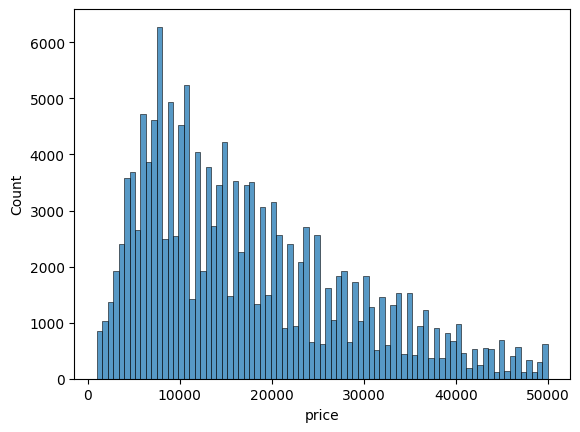

In [ ]:
sns.histplot(data=data, x='price')

<Axes: xlabel='year', ylabel='Count'>

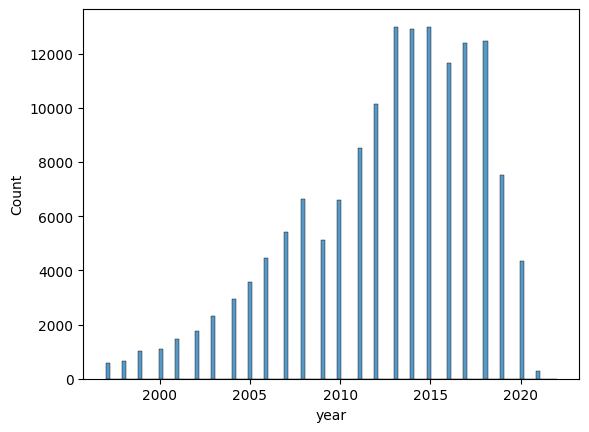

In [ ]:
sns.histplot(data=data, x='year')


<Axes: xlabel='age', ylabel='Count'>

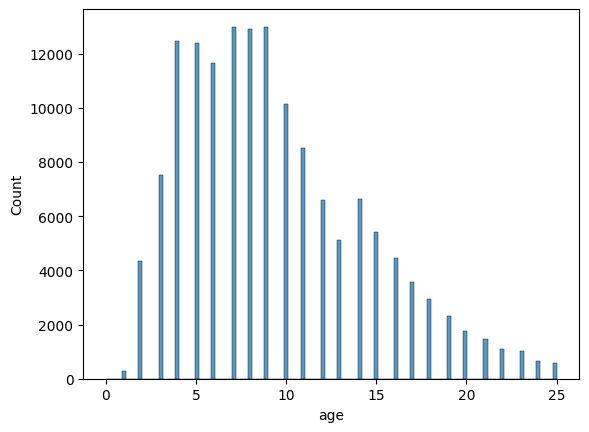

In [ ]:
sns.histplot(data=data, x='age')

<Axes: xlabel='odometer', ylabel='Count'>

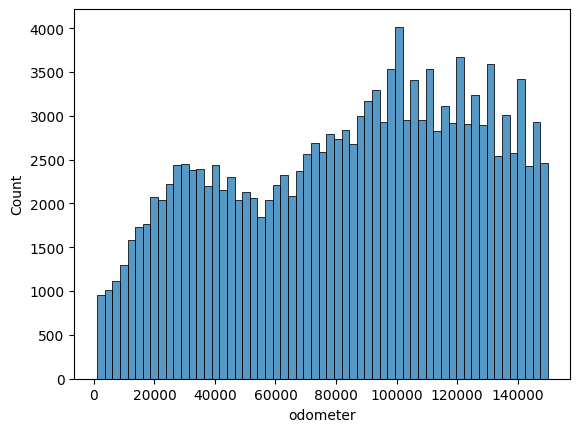

In [ ]:
sns.histplot(data=data, x='odometer')

Text(0.5, 0, 'Count')

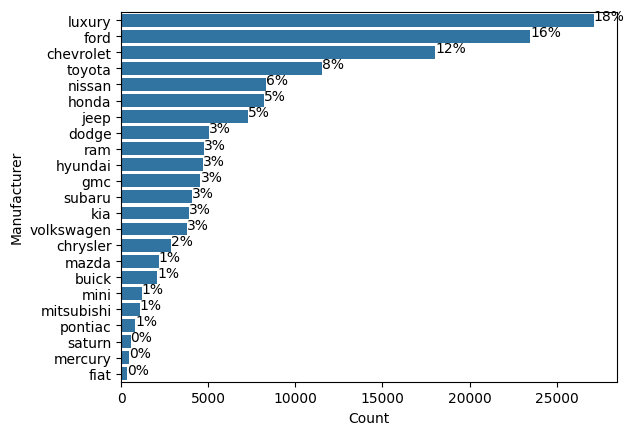

In [93]:
make = data[['manufacturer']].groupby('manufacturer').size().sort_values(ascending=False).reset_index(name='count')
ax = sns.barplot(data=make, x='count', y='manufacturer', orient='h')
total = len(data)
percentage = (make['count'] / total) * 100
# Use the calculated percentage Series to annotate the bars
for i, (x, y) in enumerate(zip(make['count'], make['manufacturer'])):
    ax.annotate('{:.0f}%'.format(percentage[i]), (x, y), ha='left')

ax.set_ylabel('Manufacturer')
ax.set_xlabel('Count')

Text(0.5, 0, 'Count')

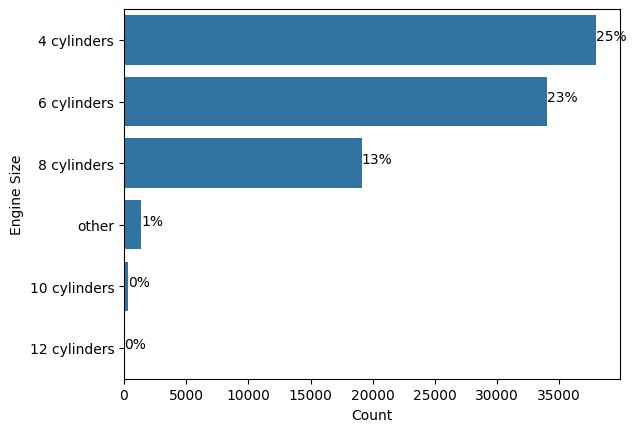

In [ ]:
vehicle_cyl = data[['cylinders']].groupby('cylinders').size().sort_values(ascending=False).reset_index(name='count')
ax = sns.barplot(data=vehicle_cyl, x='count', y='cylinders', orient='h')
total = len(data)
percentage = (vehicle_cyl['count'] / total) * 100
for i, (x, y) in enumerate(zip(vehicle_cyl['count'], vehicle_cyl['cylinders'])):
    ax.annotate('{:.0f}%'.format(percentage[i]), (x, y), ha='left')
ax.set_ylabel('Engine Size')
ax.set_xlabel('Count')

Text(0.5, 0, 'Count')

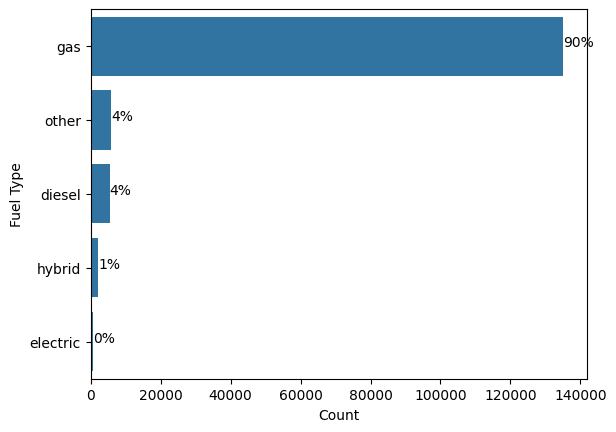

In [ ]:
vehicle_fuel = data[['fuel']].groupby('fuel').size().sort_values(ascending=False).reset_index(name='count')
ax = sns.barplot(data=vehicle_fuel, x='count', y='fuel', orient='h')
total = len(data)
percentage = (vehicle_fuel['count'] / total) * 100
for i, (x, y) in enumerate(zip(vehicle_fuel['count'], vehicle_fuel['fuel'])):
    ax.annotate('{:.0f}%'.format(percentage[i]), (x, y), ha='left')
ax.set_ylabel('Fuel Type')
ax.set_xlabel('Count')

Text(0.5, 0, 'Count')

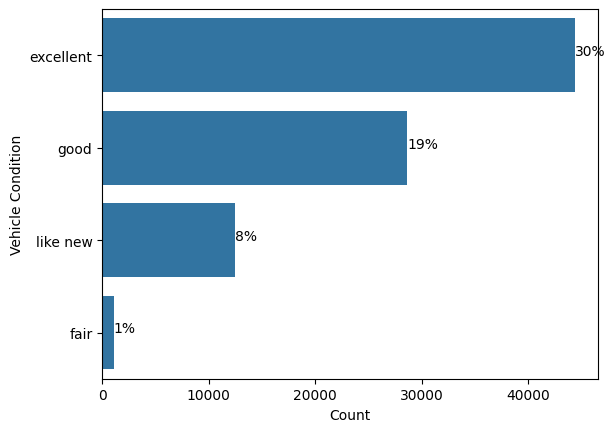

In [176]:
vehicle_cond = data[['condition']].groupby('condition').size().sort_values(ascending=False).reset_index(name='count')
ax = sns.barplot(data=vehicle_cond, x='count', y='condition', orient='h')
total = len(data)
percentage = (vehicle_cond['count'] / total) * 100
for i, (x, y) in enumerate(zip(vehicle_cond['count'], vehicle_cond['condition'])):
    ax.annotate('{:.0f}%'.format(percentage[i]), (x, y), ha='left')
ax.set_ylabel('Vehicle Condition')
ax.set_xlabel('Count')

Text(0.5, 0, 'Count')

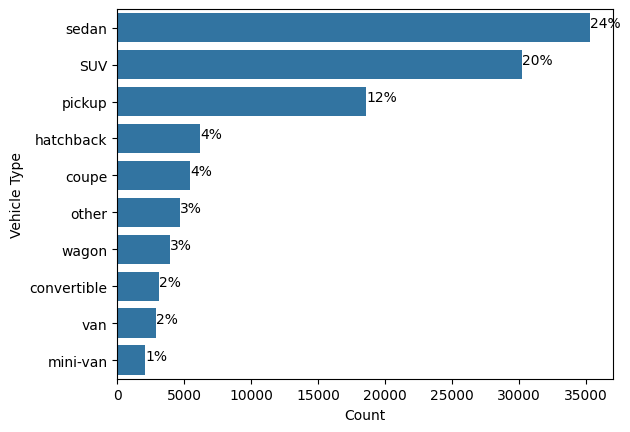

In [ ]:
vehicle_type = data[['type']].groupby('type').size().sort_values(ascending=False).reset_index(name='count')
ax = sns.barplot(data=vehicle_type, x='count', y='type', orient='h')
total = len(data)
percentage = (vehicle_type['count'] / total) * 100
for i, (x, y) in enumerate(zip(vehicle_type['count'], vehicle_type['type'])):
    ax.annotate('{:.0f}%'.format(percentage[i]), (x, y), ha='left')
ax.set_ylabel('Vehicle Type')
ax.set_xlabel('Count')

Text(0.5, 0, 'Count')

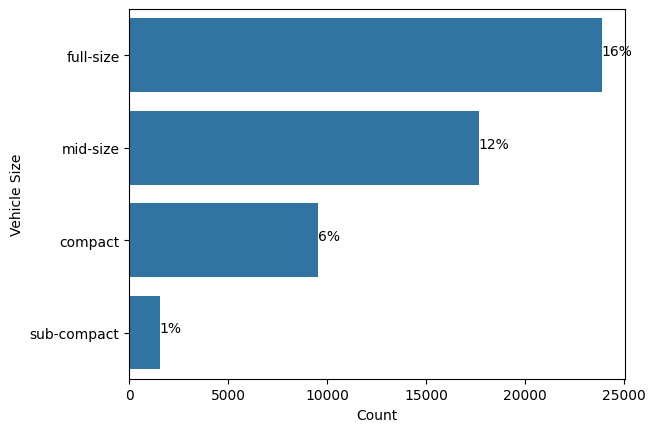

In [ ]:
vehicle_size = data[['size']].groupby('size').size().sort_values(ascending=False).reset_index(name='count')
ax = sns.barplot(data=vehicle_size, x='count', y='size', orient='h')
total = len(data)
percentage = (vehicle_size['count'] / total) * 100
for i, (x, y) in enumerate(zip(vehicle_size['count'], vehicle_size['size'])):
    ax.annotate('{:.0f}%'.format(percentage[i]), (x, y), ha='left')
ax.set_ylabel('Vehicle Size')
ax.set_xlabel('Count')

Text(0.5, 0, 'Count')

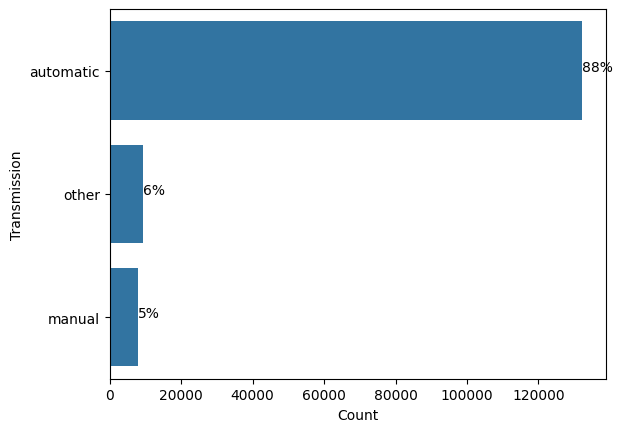

In [ ]:
vehicle_trans = data[['transmission']].groupby('transmission').size().sort_values(ascending=False).reset_index(name='count')
ax = sns.barplot(data=vehicle_trans, x='count', y='transmission', orient='h')
total = len(data)
percentage = (vehicle_trans['count'] / total) * 100
for i, (x, y) in enumerate(zip(vehicle_trans['count'], vehicle_trans['transmission'])):
    ax.annotate('{:.0f}%'.format(percentage[i]), (x, y), ha='left')
ax.set_ylabel('Transmission')
ax.set_xlabel('Count')

Text(0.5, 0, 'Count')

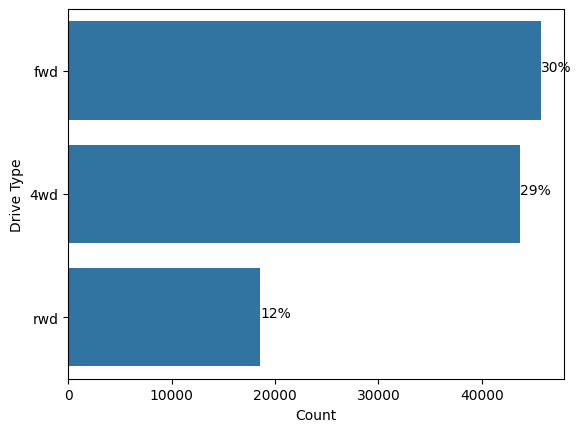

In [ ]:
vehicle_drive = data[['drive']].groupby('drive').size().sort_values(ascending=False).reset_index(name='count')
ax = sns.barplot(data=vehicle_drive, x='count', y='drive', orient='h')
total = len(data)
percentage = (vehicle_drive['count'] / total) * 100
for i, (x, y) in enumerate(zip(vehicle_drive['count'], vehicle_drive['drive'])):
    ax.annotate('{:.0f}%'.format(percentage[i]), (x, y), ha='left')
ax.set_ylabel('Drive Type')
ax.set_xlabel('Count')

Text(0.5, 0, 'Count')

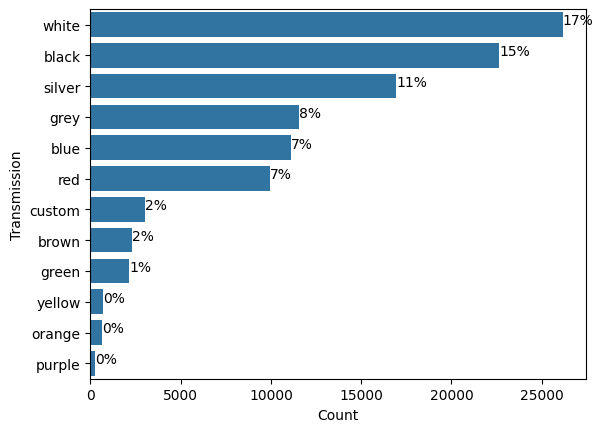

In [ ]:
vehicle_paint = data[['paint_color']].groupby('paint_color').size().sort_values(ascending=False).reset_index(name='count')
ax = sns.barplot(data=vehicle_paint, x='count', y='paint_color', orient='h')
total = len(data)
percentage = (vehicle_paint['count'] / total) * 100
for i, (x, y) in enumerate(zip(vehicle_paint['count'], vehicle_paint['paint_color'])):
    ax.annotate('{:.0f}%'.format(percentage[i]), (x, y), ha='left')
ax.set_ylabel('Transmission')
ax.set_xlabel('Count')

<Axes: >

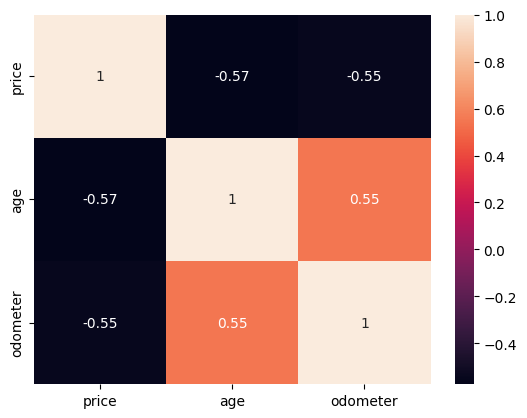

In [7]:
#Check for correlations
corr = df.corr(numeric_only = True)
sns.heatmap(corr, annot = True)

##**2.5 Summary of Observations**

All or nearly all listings included these attributes: Price, Year, Manufacturer, Model, Fuel, Odometer, Transmission.

*   The average listing price was 14,900 dollars
*   The average odometer mileage was 89,900 miles
*   The average vehicle year was 2013
*   The top 3 most popular manufacturers were: Ford, Chevrolet, and Toyota
*   90% of listings were for gas fueled cars
*   88% of listings had an automatic transmission

There was only partial data for these attributes: Condition, Cylinders, Drive, Size, Type, Paint Color. Among listings that included these attributes, the majority were for:  

*   Engine size - large 6-cylinder (23%) or 8-cylinder (13%) engines, rather than 4-cylinder (25%) engines
*   Vehicle condition - Excellent (30%) or Good (19%), followed by Like New (8%)
*   Vehicle type - Sedans (23%), or SUVs (20%), followed by Pickups and Trucks (12%)
*   Vehicle size - Full size (16%), followed by Mid-size (12%) and Compact (6%)
*   Drive – 4WD (29%), Forward (30%) and Rear (12%)
*   Paint Color – White (17%), Black (15%), and Silver (11%)

The three numeric variables are all correlated. Price is negatively correlated with age and odometer, and age and odometer are positively correlated with each other.




##**2.6. Data Preparation**

Now the dataset will be prepared for modeling.

1. Drop string variables which have too much or too little heterogenity, or do not contribute to customer appeal: VIN, region, model, type, title_status, clean_title, paint_color, state, transmission, fuel

On the first pass, we took the following steps as well. Subsequently these steps were incorporated into the model with a preprocessor pipeline, so they have been commented out, but the outputs are still displayed.

2. Transformations - convert Year to an age, and string variables to dummy categoricals that can be ingested by the model: manufacturer, drive, size, type

3. Normalization - re-scale numeric variables which have skewed (non-Gaussian) distributions: age and odometer


In [177]:
df = data[['price', 'age', 'odometer', 'manufacturer', 'condition', 'cylinders', 'drive', 'type']]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 149861 entries, 31 to 426879
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         149861 non-null  float64
 1   age           149861 non-null  float64
 2   odometer      149861 non-null  float64
 3   manufacturer  146014 non-null  object 
 4   condition     86609 non-null   object 
 5   cylinders     92826 non-null   object 
 6   drive         107961 non-null  object 
 7   type          112361 non-null  object 
dtypes: float64(3), object(5)
memory usage: 10.3+ MB


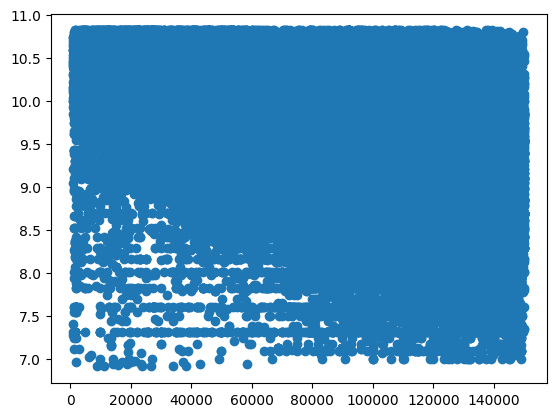

In [208]:
plt.scatter(X.odometer, y, label = 'data')

In [ ]:
#Normalize numerical variables with skewed distributions
#data['age_scaled'] = (data['age'] - data['age'].mean())/data['age'].std()
#data['miles_scaled'] = (data['odometer'] - data['odometer'].mean())/data['odometer'].std()
#data.drop (columns =['year', 'age', 'odometer'], inplace = True)
#data.describe()

,price,age_scaled,miles_scaled
count,149861.00,149861.00,149861.00
mean,17255.70,0.00,0.00
std,11074.31,1.00,1.00
min,1003.00,-1.89,-2.06
25%,8312.00,-0.69,-0.84
50%,14900.00,-0.09,0.12
75%,23995.00,0.52,0.84
max,49999.00,3.12,1.64


In [ ]:
#Convert categoricals into dummies
#dummies=pd.get_dummies(data[['manufacturer', 'size', 'type', 'condition', 'cylinders']], drop_first=False, dtype=int)
# Printing number of count of each unique value in each column
#for column in dummies:
#    print(dummies[column].value_counts().reset_index())
#    print("-" * 50)


In [ ]:
#Append the dummy variables to the dataset and drop string variables
#data_final=pd.concat([data, dummies], axis=1)
#data_final.drop (columns =['manufacturer', 'condition', 'cylinders', 'drive', 'size', 'type'], inplace = True)
#data_final.shape

(149861, 52)

##**3. Modeling**

Linear regression will the primary modeling technique. Various strategies for feature inclusion will be tested. Models will be evaluated using mean squared error and by goodness of fit (R squared) metrics. Model parameters will be tunded to improve both.

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.feature_selection import SelectPercentile, chi2, f_regression
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer, TransformedTargetRegressor
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt

###**3.1 Model test design**

In [179]:
#Split data into target and independent features, using log of target variable
X = df.drop('price', axis=1)
y = np.log(df['price'])
print(X.shape)
print(y.shape)

(149861, 7)
(149861,)


In [180]:
#Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(104902, 7)
(104902,)
(44959, 7)
(44959,)


In [181]:
#Baseline predictions
baseline_train = np.ones(shape = y_train.shape)*y_train.mean()
baseline_test = np.ones(shape = y_test.shape)*y_test.mean()
print(baseline_train.shape, baseline_test.shape)

# Calculate evaluation metrics
mse_baseline_train = mean_squared_error(baseline_train, y_train)
mse_baseline_test = mean_squared_error(baseline_test, y_test)
print(f'Baseline MSE for training data: {mse_baseline_train}')
print(f'Baseline MSE for testing data: {mse_baseline_test}')

(104902,) (44959,)
Baseline MSE for training data: 0.5193176745352442
Baseline MSE for testing data: 0.5240405540071166


###**3.2 Feature preparation and transformation**

In [182]:
# Convert Condition to ordinal type and define categorical, ordinal and numerical features in X
X.condition = X.condition.astype('category')
categoric = X.select_dtypes(include=['object']).columns.tolist()
ordinal = X.select_dtypes(include=['category']).columns.tolist()
numeric = X.select_dtypes(include=['number']).columns.tolist()

print('Categorical columns:', categoric)
print('Ordinal columns:', ordinal)
print('Numeric columns:', numeric)

Categorical columns: ['manufacturer', 'cylinders', 'drive', 'type']
Ordinal columns: ['condition']
Numeric columns: ['age', 'odometer']


In [183]:
#Preprocessor with scaling, ordinal, and dummy variables
cond_cat=['fair', 'good', 'excellent', 'like new']
preprocessor = ColumnTransformer(transformers=[
('Numeric', make_pipeline(StandardScaler()), numeric),
        ('Categorical', make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder()), categoric),
        ('Ordinal', make_pipeline(SimpleImputer(strategy='most_frequent'), OrdinalEncoder(categories=[cond_cat])), ['condition']),
        ], verbose_feature_names_out=True, sparse_threshold=0)
preprocessor

ColumnTransformer(sparse_threshold=0,
                  transformers=[('Numeric',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler())]),
                                 ['age', 'odometer']),
                                ('Categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder())]),
                                 ['manufacturer', 'cylinders', 'drive',
                                  'type']),
                                ('Ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['fair',
                                                                              'good',
                                                                              'excellent',
                                                                              'like '
                                                                              'new']]))]),
                                 ['condition'])])

In [184]:
X_pre = preprocessor.fit_transform(X, y)
X_pre.shape

(149861, 45)

###**3.3 Models**

###Model 1. OLS linear regression (Oridinary Least Squares)

In [185]:
#Pipeline using OLS linear Regression
ols_pipe = Pipeline([('preprocessor', preprocessor),
            ('model', LinearRegression())])
ols_pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('Numeric',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'odometer']),
                                                 ('Categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['manufacturer', 'cylinders',
                                                   'drive', 'type']),
                                                 ('Ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['fair',
                                                                                               'good',
                                                                                               'excellent',
                                                                                               'like '
                                                                                               'new']]))]),
                                                  ['condition'])])),
                ('model', LinearRegression())])

In [186]:
#Fit model and make predictions
ols_pipe.fit(X_train, y_train)
ols_train_preds = ols_pipe.predict(X_train)
ols_test_preds = ols_pipe.predict(X_test)

#Calculate evaluation metrics
train_mse = mean_squared_error(y_train, ols_train_preds)
test_mse = mean_squared_error(y_test, ols_test_preds)
print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')

train_r2 = metrics.r2_score(y_train, ols_train_preds)
print('Train R-Squared:', train_r2)
test_r2 = metrics.r2_score(y_test, ols_test_preds)
print('Test R-Squared:', test_r2)

Train MSE: 0.18502304338696204
Test MSE: 0.18980207786703243
Train R-Squared: 0.6437189557383239
Test R-Squared: 0.6378103251443115


In [187]:
#Extract coefficient values and feature names and put into dataframe
feature_names = ols_pipe['preprocessor'].get_feature_names_out()
feature_df = pd.DataFrame({'Feature': feature_names, 'Coef Value': ols_pipe.named_steps['model'].coef_})
#Sort by coefficient values
feature_df = feature_df.sort_values('Coef Value', ascending=False)
feature_df.head(50)

,Feature,Coef Value
26,Categorical__cylinders_12 cylinders,0.472610
20,Categorical__manufacturer_ram,0.344533
8,Categorical__manufacturer_gmc,0.300717
13,Categorical__manufacturer_luxury,0.277014
11,Categorical__manufacturer_jeep,0.239024
40,Categorical__type_pickup,0.232104
23,Categorical__manufacturer_toyota,0.205869
25,Categorical__cylinders_10 cylinders,0.196959
35,Categorical__type_convertible,0.175362
7,Categorical__manufacturer_ford,0.153748


###Model 2. Feature selection in preprocessor, then OLS linear regression

In [203]:
#Preprocessor with selectors
preprocessor1 = ColumnTransformer(transformers=[
        ('Numeric', make_pipeline(StandardScaler(), SelectPercentile(f_regression, percentile=10)), numeric),
        ('Categorical', make_pipeline(SimpleImputer(strategy='most_frequent'), OneHotEncoder(), SelectPercentile(f_regression, percentile=10)), categoric),
        ('Ordinal', make_pipeline(SimpleImputer(strategy='most_frequent'), OrdinalEncoder(categories = [['like new', 'excellent', 'good', 'fair']])), ['condition'])
        ], verbose_feature_names_out=True, sparse_threshold=0)
preprocessor1

ColumnTransformer(sparse_threshold=0,
                  transformers=[('Numeric',
                                 Pipeline(steps=[('standardscaler',
                                                  StandardScaler()),
                                                 ('selectpercentile',
                                                  SelectPercentile(score_func=<function f_regression at 0x7da1f1de49d0>))]),
                                 ['age', 'odometer']),
                                ('Categorical',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('onehotencoder',
                                                  OneHotEncoder()),
                                                 ('selectpercentile',
                                                  SelectPercentile(score_func=<function f_regression at 0x7da1f1de49d0>))]),
                                 ['manufacturer', 'cylinders', 'drive',
                                  'type']),
                                ('Ordinal',
                                 Pipeline(steps=[('simpleimputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['like '
                                                                              'new',
                                                                              'excellent',
                                                                              'good',
                                                                              'fair']]))]),
                                 ['condition'])])

In [204]:
X_pre1 = preprocessor1.fit_transform(X, y)
X_pre1.shape

(149861, 7)

In [205]:
#Pipeline using preprocessor with selectors and OLS linear Regression
selector_pipe = Pipeline([('preprocessor1', preprocessor1),
            ('model', LinearRegression())])
selector_pipe

Pipeline(steps=[('preprocessor1',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('Numeric',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler()),
                                                                  ('selectpercentile',
                                                                   SelectPercentile(score_func=<function f_regression at 0x7da1f1de49d0>))]),
                                                  ['age', 'odometer']),
                                                 ('Categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('o...
                                                                  ('selectpercentile',
                                                                   SelectPercentile(score_func=<function f_regression at 0x7da1f1de49d0>))]),
                                                  ['manufacturer', 'cylinders',
                                                   'drive', 'type']),
                                                 ('Ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['like '
                                                                                               'new',
                                                                                               'excellent',
                                                                                               'good',
                                                                                               'fair']]))]),
                                                  ['condition'])])),
                ('model', LinearRegression())])

In [206]:
#Fit model and make predictions
selector_pipe.fit(X_train, y_train)
selector_train_preds = selector_pipe.predict(X_train)
selector_test_preds = selector_pipe.predict(X_test)

#Calculate evaluation metrics
train_mse = mean_squared_error(y_train, selector_train_preds)
test_mse = mean_squared_error(y_test, selector_test_preds)
print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')

train_r2 = metrics.r2_score(y_train, selector_train_preds)
print('Train R-Squared:', train_r2)
test_r2 = metrics.r2_score(y_test, selector_test_preds)
print('Test R-Squared:', test_r2)


Train MSE: 0.24163954567951526
Test MSE: 0.24559705302230014
Train R-Squared: 0.53469801331956
Test R-Squared: 0.5313396050280397


In [207]:
feature_names1 = selector_pipe['preprocessor1'].get_feature_names_out()
feature_df1 = pd.DataFrame({'Feature': feature_names1, 'Coef Value': selector_pipe.named_steps['model'].coef_})
#Sort by coefficient values
feature_df1 = feature_df1.sort_values('Coef Value', ascending=False)
feature_df1.head(50)

,Feature,Coef Value
4,Categorical__type_pickup,0.275029
1,Categorical__cylinders_8 cylinders,0.258141
2,Categorical__drive_4wd,-0.057748
6,Ordinal__condition,-0.074533
5,Categorical__type_sedan,-0.085310
3,Categorical__drive_fwd,-0.339879
0,Numeric__age,-0.463591


###Model 3. Ridge linear regression with grid search

In [125]:
#Pipeline using Ridge linear Regression
ridge_pipe = Pipeline([('preprocessor', preprocessor),
            ('model', Ridge())])
ridge_pipe

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(sparse_threshold=0,
                                   transformers=[('Numeric',
                                                  Pipeline(steps=[('standardscaler',
                                                                   StandardScaler())]),
                                                  ['age', 'odometer']),
                                                 ('Categorical',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehotencoder',
                                                                   OneHotEncoder())]),
                                                  ['manufacturer', 'cylinders',
                                                   'drive', 'type']),
                                                 ('Ordinal',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ordinalencoder',
                                                                   OrdinalEncoder(categories=[['fair',
                                                                                               'good',
                                                                                               'excellent',
                                                                                               'like '
                                                                                               'new']]))]),
                                                  ['condition'])])),
                ('model', Ridge())])

In [126]:
#Fit model and make predictions
#While definining grid and finding best alpha
param_dict = {'model__alpha': [0.001, 0.1, 1.0, 10.0, 100.0, 1000.0]}
grid = GridSearchCV(ridge_pipe, param_grid=param_dict)
grid.fit(X_train, y_train)
grid_train_preds = grid.predict(X_train)
grid_test_preds = grid.predict(X_test)
print(f'Best Alpha: {list(ridge_best_alpha.values())[0]}')

#Calculate evaluation metrics
train_mse = mean_squared_error(y_train, grid_train_preds)
test_mse = mean_squared_error(y_test, grid_test_preds)
print(f'Train MSE: {train_mse}')
print(f'Test MSE: {test_mse}')

train_r2 = metrics.r2_score(y_train, grid_train_preds)
print('Train R-Squared:', train_r2)
test_r2 = metrics.r2_score(y_test, grid_test_preds)
print('Test R-Squared:', test_r2)




Best Alpha: 0.001
Train MSE: 0.18502304420892465
Test MSE: 0.18980229609915433
Train R-Squared: 0.6437189541555497
Test R-Squared: 0.637809908703026


In [127]:
feature_names2 = ridge_pipe['preprocessor'].get_feature_names_out()
feature_df2 = pd.DataFrame({'Feature': feature_names2, 'Coef Value': grid.best_estimator_.named_steps['model'].coef_})

#Sort by coefficient values
feature_df2 = feature_df2.sort_values('Coef Value', ascending=False)
feature_df2.head(50)


,Feature,Coef Value
26,Categorical__cylinders_12 cylinders,0.471389
20,Categorical__manufacturer_ram,0.344506
8,Categorical__manufacturer_gmc,0.300691
13,Categorical__manufacturer_luxury,0.276999
11,Categorical__manufacturer_jeep,0.239003
40,Categorical__type_pickup,0.232105
23,Categorical__manufacturer_toyota,0.205851
25,Categorical__cylinders_10 cylinders,0.197122
35,Categorical__type_convertible,0.175352
7,Categorical__manufacturer_ford,0.153732


###**3.4 Summary of Model Results**



Models 1 & 2 had very similar results.



**Summary of Coefficients**

**Models 1 & 3**

Strong++	12 cylinders, Luxury,
Pickup, Ram, GMC, Jeep, Toyota

Weak+	10 cylinders, Convertible, 4WD,
Ford, Honda, Chevrolet
Condition

Weak-	Wagon, Sedan, Chysler, Nissan, Hyundai, Kia
4 or 6 cylinders,FWD

Strong--	Odometer, Hatchback, Mitsubishi, Saturn, Mercury, Fiat, Age

**Model 2**
Strong++ Pickup, 8 cylinders

Weak- 4WD, Condition, Sedan

Strong-- FWD, Age

###**4. Evaluation**

The descriptive statistics and linear regression model estimated from the dataset have resulted in useful insights.

###**4.1 Assessment of Data Mining Results**

The data mining goals are to a) identify the most valuable attributes of used cars, and b) predict the sales price of a vehicle. The first goal has been achieved, as shown in the section above. The second goal has also been achieved, as Model 1 could be used to predict a sales price with 64% accuracy.

The success criteria of a pricing model which achieves a minimum of 80% accuracy was not achieved. One limitation was the dataset itself. Although it seemed robust with nearly 500,000 listings, after data cleaning we were left with only 150,000. Many of those listings were missing important nature such as vehicle condition. The models developed here could be improved with a larger and more complete dataset.


###**4.2 Review of Business Questions**

This analysis have achieved the primary client objective of identifying the primary drivers of used car value. Based on the attributes identified, the client should be able to quickly assess a new vehicle when it arrives and calculate an attractive sales price using the pricing model.